<a href="https://colab.research.google.com/github/CodeHunterOfficial/NLP_2024-2025/blob/main/Lecture%207.%20RNN/Lecture_7_1_%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_RNN%2C_LSTM%2C_GRU%2C_Bidirectional_%D0%B2_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Применение RNN, LSTM, GRU, Bidirectional в NLP

### Введение

Рекуррентные нейронные сети (Recurrent Neural Networks, RNN) и их расширения, такие как LSTM (Long Short-Term Memory) и GRU (Gated Recurrent Units), играют ключевую роль в обработке естественного языка (Natural Language Processing, NLP). Эти сети способны захватывать временную динамику последовательных данных, таких как текст, что делает их особенно полезными для задач NLP.

### Рекуррентные нейронные сети (RNN)

RNN предназначены для обработки последовательностей данных, учитывая зависимость между элементами последовательности. В RNN выход на текущем временном шаге зависит не только от текущего ввода, но и от состояния, передаваемого с предыдущего шага.

#### Forward Pass в RNN

На каждом временном шаге $ t $, RNN принимает вход $ x_t $ и предыдущее скрытое состояние $ h_{t-1} $. Новое скрытое состояние $ h_t $ вычисляется как:
$$ h_t = \tanh(W_h \cdot h_{t-1} + W_x \cdot x_t + b_h) $$
где:
- $ W_h $ - матрица весов скрытого состояния,
- $ W_x $ - матрица весов входного состояния,
- $ b_h $ - смещение,
- $ \tanh $ - функция активации гиперболического тангенса.

Выход сети может быть определен как:
$$ y_t = W_y \cdot h_t + b_y $$
где:
- $ W_y $ - матрица весов выходного состояния,
- $ b_y $ - смещение выхода.

#### Backpropagation Through Time (BPTT)

Обратное распространение ошибки во времени (Backpropagation Through Time, BPTT) используется для обучения RNN. Ошибка на каждом временном шаге распространяется назад через все временные шаги. Градиенты вычисляются с учетом временной зависимости, что требует учета предыдущих временных шагов.

### Long Short-Term Memory (LSTM)

LSTM решает проблему затухающих и взрывающихся градиентов в RNN, используя специальные механизмы для управления потоком информации.

#### Структура LSTM

LSTM включает три основные "входные двери" (gates):
1. **Forget gate**: решает, какую информацию забыть.
$$ f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f) $$

2. **Input gate**: решает, какую информацию добавить.
$$ i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i) $$
$$ \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C) $$

3. **Output gate**: решает, что использовать на выходе.
$$ o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o) $$

Наконец, новое состояние ячейки и скрытое состояние определяются как:
$$ C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t $$
$$ h_t = o_t \cdot \tanh(C_t) $$

#### Forward Pass в LSTM

На каждом шаге:
1. Forget gate решает, какую часть информации забыть из предыдущего состояния.
2. Input gate решает, какую новую информацию добавить.
3. Output gate решает, что использовать на выходе.

### Gated Recurrent Units (GRU)

GRU - это упрощенная версия LSTM, которая объединяет forget и input gates в один "update gate".

#### Структура GRU

Основные уравнения для GRU:
$$ z_t = \sigma(W_z \cdot [h_{t-1}, x_t] + b_z) $$
$$ r_t = \sigma(W_r \cdot [h_{t-1}, x_t] + b_r) $$
$$ \tilde{h}_t = \tanh(W_h \cdot [r_t \cdot h_{t-1}, x_t] + b_h) $$
$$ h_t = (1 - z_t) \cdot h_{t-1} + z_t \cdot \tilde{h}_t $$

#### Forward Pass в GRU

1. Update gate $ z_t $ решает, сколько информации из прошлого состояния сохранять.
2. Reset gate $ r_t $ решает, сколько информации из прошлого состояния использовать для вычисления нового состояния.
3. Новое скрытое состояние $ \tilde{h}_t $ вычисляется с учетом reset gate.
4. Финальное состояние $ h_t $ является комбинацией старого состояния и нового состояния $ \tilde{h}_t $.

### Bidirectional RNN (Bi-RNN)

Bidirectional RNNs учитывают зависимость от предыдущих и последующих элементов последовательности, обрабатывая данные в обоих направлениях.

#### Структура Bi-RNN

Bi-RNN состоит из двух RNN: одна обрабатывает последовательность слева направо (forward RNN), другая - справа налево (backward RNN).

На каждом временном шаге:
$$ \overrightarrow{h}_t = \tanh(W_h \cdot \overrightarrow{h}_{t-1} + W_x \cdot x_t + b_h) $$
$$ \overleftarrow{h}_t = \tanh(W_h \cdot \overleftarrow{h}_{t+1} + W_x \cdot x_t + b_h) $$

Выходы обеих сетей объединяются:
$$ h_t = [\overrightarrow{h}_t; \overleftarrow{h}_t] $$



### 1. **Классификация текстов (Text Classification)**
   - **Цель**: Определение категории или класса текстового документа.
   - **Модель**: LSTM или GRU с полносвязанным (fully connected) слоем и softmax на выходе.
   - **Метрики**: Точность (Accuracy), Полнота (Recall), Точность (Precision), F1-мера.
   - **Функция потерь**: Cross-Entropy Loss (кросс-энтропийная функция потерь).

### 2. **Анализ тональности (Sentiment Analysis)**
   - **Цель**: Определение тональности текста (положительная, нейтральная, отрицательная).
   - **Модель**: Bi-LSTM или Bi-GRU для захвата контекста как слева направо, так и справа налево.
   - **Метрики**: Accuracy, Precision, Recall, F1-score.
   - **Функция потерь**: Cross-Entropy Loss (кросс-энтропийная функция потерь).

### 3. **Обнаружение фальшивых новостей (Fake News Detection)**
   - **Цель**: Определение, является ли новость подлинной или фальшивой.
   - **Модель**: RNN, LSTM или GRU с attention механизмом.
   - **Метрики**: Accuracy, Precision, Recall, F1-score.
   - **Функция потерь**: Cross-Entropy Loss (кросс-энтропийная функция потерь).

### 4. **Распознавание ключевых фраз (Keyphrase Extraction)**
   - **Цель**: Извлечение ключевых фраз из текста.
   - **Модель**: Bi-LSTM с CRF для последовательной классификации.
   - **Метрики**: Precision, Recall, F1-score.
   - **Функция потерь**: CRF Loss (функция потерь для CRF).

### 5. **Обобщение текстов (Text Summarization)**
   - **Цель**: Создание краткого содержания текста.
   - **Модель**: Seq2Seq с LSTM или GRU и механизмом внимания (attention).
   - **Метрики**: ROUGE (Recall-Oriented Understudy for Gisting Evaluation).
   - **Функция потерь**: Cross-Entropy Loss (кросс-энтропийная функция потерь) с механизмом teacher forcing.

### 6. **Ответ на вопросы (Question Answering)**
   - **Цель**: Автоматическое предоставление ответов на заданные вопросы на основе текста.
   - **Модель**: Bi-LSTM или Bi-GRU с attention и механизмами сравнения вопросов и контекста.
   - **Метрики**: Exact Match (EM), F1-score.
   - **Функция потерь**: Cross-Entropy Loss (кросс-энтропийная функция потерь).

### 7. **Порождение текста (Text Generation)**
   - **Цель**: Генерация осмысленного текста на основе заданного ввода.
   - **Модель**: RNN, LSTM или GRU в режиме генератора (generator).
   - **Метрики**: Perplexity, BLEU.
   - **Функция потерь**: Cross-Entropy Loss (кросс-энтропийная функция потерь).

### 8. **Перевод текста (Text Translation)**
   - **Цель**: Перевод текста с одного языка на другой.
   - **Модель**: Seq2Seq с механизмом внимания, используемый в моделях типа LSTM или GRU.
   - **Метрики**: BLEU, METEOR.
   - **Функция потерь**: Cross-Entropy Loss (кросс-энтропийная функция потерь).

### 9. **Автоматическое исправление орфографии (Spell Correction)**
   - **Цель**: Исправление ошибок в тексте.
   - **Модель**: Seq2Seq с attention.
   - **Метрики**: Accuracy, Precision, Recall.
   - **Функция потерь**: Cross-Entropy Loss (кросс-энтропийная функция потерь).

### 10. **Диалоговые системы и чат-боты (Dialogue Systems and Chatbots)**
   - **Цель**: Ведение диалога с пользователями.
   - **Модель**: Seq2Seq с attention, возможно с добавлением reinforcement learning для улучшения качества диалогов.
   - **Метрики**: BLEU, метрики оценки человеческого взаимодействия (Human Evaluation Metrics).
   - **Функция потерь**: Cross-Entropy Loss (кросс-энтропийная функция потерь).

### 11. **Парсинг зависимостей (Dependency Parsing)**
   - **Цель**: Определение грамматической структуры предложения.
   - **Модель**: Bi-LSTM с CRF.
   - **Метрики**: LAS (Labeled Attachment Score), UAS (Unlabeled Attachment Score).
   - **Функция потерь**: CRF Loss (функция потерь для CRF).

### 12. **Определение правописания (Part-of-Speech Tagging)**
   - **Цель**: Присвоение части речи каждому слову в предложении.
   - **Модель**: Bi-LSTM или Bi-GRU с CRF.
   - **Метрики**: Accuracy.
   - **Функция потерь**: CRF Loss (функция потерь для CRF).

### 13. **Частеречная разметка (POS Tagging)**
   - **Цель**: Присвоение каждой словоформе в тексте соответствующей части речи.
   - **Модель**: Bi-LSTM с выходным слоем softmax.
   - **Метрики**: Accuracy.
   - **Функция потерь**: Cross-Entropy Loss (кросс-энтропийная функция потерь).

### 14. **Распознавание именованных сущностей (NER)**
   - **Цель**: Идентификация и классификация именованных сущностей (имена, организации, даты).
   - **Модель**: Bi-GRU с CRF (Conditional Random Fields) на выходе.
   - **Метрики**: Precision, Recall, F1-score.
   - **Функция потерь**: CRF Loss (функция потерь для CRF).

### 15. **Машинный перевод (Machine Translation)**
   - **Цель**: Перевод текста с одного языка на другой.
   - **Модель**: Seq2Seq (Sequence-to-Sequence) с LSTM или GRU, часто с вниманием (attention).
   - **Метрики**: BLEU, METEOR, TER.
   - **Функция потерь**: Cross-Entropy Loss (кросс-энтропийная функция потерь).

### 16. **Определение авторства (Authorship Attribution)**
   - **Цель**: Установление автора текста на основе его стилистических особенностей.
   - **Модель**: Классификаторы на основе статистических признаков текста, таких как частотность слов, длина предложений, синтаксические конструкции.
   - **Метрики**: Точность, полнота, F1-мера.
   - **Функция потерь**: Cross-Entropy Loss (кросс-энтропийная функция потерь).

### 17. **Разрешение синонимии и антонимии (Synonym and Antonym Resolution)**
   - **Цель**: Определение, являются ли два слова синонимами или антонимами.
   - **Модель**: Siamese LSTM или GRU с полносвязанным слоем и сигмоидной функцией активации на выходе.
   - **Метрики**: Accuracy, Precision, Recall, F1-score.
   - **Функция потерь**: Binary Cross-Entropy Loss (бинарная кросс-энтропийная функция потерь).


### Формулы метрик, используемых в NLP задачах

#### 1. **Accuracy (Точность)**
   - **Формула**:
     $$
     \text{Accuracy} = \frac{\text{Количество правильных предсказаний}}{\text{Общее количество предсказаний}}
     $$

#### 2. **Precision (Точность)**
   - **Формула**:
     $$
     \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
     $$
     где:
     - $\text{TP}$ — количество истинно положительных предсказаний
     - $\text{FP}$ — количество ложно положительных предсказаний

#### 3. **Recall (Полнота)**
   - **Формула**:
     $$
     \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
     $$
     где:
     - $\text{TP}$ — количество истинно положительных предсказаний
     - $\text{FN}$ — количество ложно отрицательных предсказаний

#### 4. **F1-score**
   - **Формула**:
     $$
     \text{F1-score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
     $$

#### 5. **ROUGE (Recall-Oriented Understudy for Gisting Evaluation)**
   - **Формулы** (например, для ROUGE-N):
     $$
     \text{ROUGE-N} = \frac{\sum_{\text{референсные n-граммы}} \min(\text{Count}_{\text{референс}}, \text{Count}_{\text{система}})}{\sum_{\text{референсные n-граммы}} \text{Count}_{\text{референс}}}
     $$

#### 6. **Exact Match (EM)**
   - **Формула**:
     $$
     \text{EM} = \frac{\text{Количество точно совпадающих ответов}}{\text{Общее количество вопросов}}
     $$

#### 7. **Perplexity**
   - **Формула**:
     $$
     \text{Perplexity} = 2^{-\frac{1}{N} \sum_{i=1}^{N} \log_2(P(w_i))}
     $$
     где:
     - $N$ — общее количество слов в тестовом наборе
     - $P(w_i)$ — вероятность слова $w_i$

#### 8. **BLEU (Bilingual Evaluation Understudy)**
   - **Формула**:
     $$
     \text{BLEU} = \text{BP} \times \exp \left( \sum_{n=1}^{N} w_n \log p_n \right)
     $$
     где:
     - $p_n$ — модифицированная точность н-грамм
     - $w_n$ — вес н-грамм (обычно равен $\frac{1}{N}$)
     - $\text{BP}$ — brevity penalty, которая корректирует длину

#### 9. **METEOR (Metric for Evaluation of Translation with Explicit ORdering)**
   - **Формула**:
     $$
     \text{METEOR} = 10 \times \frac{P \times R}{R + 9P}
     $$
     где:
     - $P$ — точность
     - $R$ — полнота

#### 10. **TER (Translation Edit Rate)**
   - **Формула**:
     $$
     \text{TER} = \frac{\text{Количество изменений}}{\text{Количество слов в референсном переводе}}
     $$

#### 11. **LAS (Labeled Attachment Score)**
   - **Формула**:
     $$
     \text{LAS} = \frac{\text{Количество правильно предсказанных зависимостей с правильными метками}}{\text{Общее количество зависимостей}}
     $$

#### 12. **UAS (Unlabeled Attachment Score)**
   - **Формула**:
     $$
     \text{UAS} = \frac{\text{Количество правильно предсказанных зависимостей без учета меток}}{\text{Общее количество зависимостей}}
     $$


### Формулы функций потерь

#### 1. Cross-Entropy Loss (Кросс-энтропийная функция потерь)
Для задач классификации, таких как классификация текстов, анализ тональности и обнаружение фальшивых новостей:

$$
\mathcal{L} = - \sum_{i=1}^{N} y_i \log(\hat{y}_i)
$$

где $ N $ — количество классов, $ y_i $ — истинная метка, $ \hat{y}_i $ — предсказанная вероятность.

#### 2. CRF Loss (Функция потерь CRF)
Для задач последовательной классификации, таких как распознавание ключевых фраз и парсинг зависимостей:

$$
\mathcal{L} = - \log P(y|x)
$$

где $ P(y|x) $ — вероятность последовательности меток $ y $ для входной последовательности $ x $.

#### 3. Cross-Entropy Loss с механизмом teacher forcing
Для задач генерации последовательностей, таких как обобщение текстов, машинный перевод и автоматическое исправление орфографии:

$$
\mathcal{L} = - \sum_{t=1}^{T} \sum_{i=1}^{V} y_{t,i} \log(\hat{y}_{t,i})
$$

где $ T $ — длина последовательности, $ V $ — размер словаря, $ y_{t,i} $ — истинная метка на шаге $ t $, $ \hat{y}_{t,i} $ — предсказанная вероятность.

#### 4. Binary Cross-Entropy Loss (Бинарная кросс-энтропийная функция потерь)
Для задач бинарной классификации, таких как разрешение синонимии и антонимии:

$$
\mathcal{L} = - \frac{1}{N} \sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]
$$

где $ N $ — количество примеров, $ y_i $ — истинная метка (0 или 1), $ \hat{y}_i $ — предсказанная вероятность.


Таким образом, использование RNN, LSTM, GRU и Bidirectional RNN в NLP позволяет моделям эффективно обрабатывать последовательные данные, учитывая контекст. Эти методы нашли широкое применение в различных задачах NLP, улучшая точность и качество предсказаний.


## Примеры использования RNN в NLP

### 1. **Определение авторства (Authorship Attribution)**

Давайте создадим небольшой корпус текстов от нескольких "авторов" и решим задачу определения авторства для конкретного текста. Мы используем Python с библиотекой Keras для создания и обучения модели.

### Шаг 1: Создание корпуса

Мы создадим искусственный корпус текстов от трех авторов: "Автор A", "Автор B" и "Автор C".

```python
# Корпус текстов
corpus = {
    "Author A": [
        "This is the first text by Author A.",
        "Author A writes in a specific way.",
        "The unique style of Author A is evident."
    ],
    "Author B": [
        "Here is a sample text by Author B.",
        "Writing style of Author B can be recognized.",
        "Author B has a distinct way of writing."
    ],
    "Author C": [
        "An example text by Author C is given here.",
        "Recognizing Author C's style is interesting.",
        "Author C's writing is unique in its own way."
    ]
}
```

### Шаг 2: Предобработка текста

Преобразуем тексты в числовые представления и создадим обучающий набор данных.

```python
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Список всех текстов и соответствующих авторов
texts = []
labels = []

for author, texts_list in corpus.items():
    for text in texts_list:
        texts.append(text)
        labels.append(author)

# Преобразование меток авторов в числовые значения
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Токенизация текстов
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, padding='post')

# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

# Преобразование меток в one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
```

### Шаг 3: Создание и обучение модели

Создадим и обучим Bi-LSTM модель для определения авторства.

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

# Параметры модели
vocab_size = 1000  # Размер словаря
embedding_dim = 64  # Размерность эмбеддингов
max_length = max(len(seq) for seq in padded_sequences)  # Максимальная длина входных последовательностей
num_classes = len(corpus)  # Количество авторов

# Создание модели
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
```

### Шаг 4: Проверка модели

Используем обученную модель для предсказания автора конкретного текста.

```python
# Пример текста для предсказания автора
new_text = "This text is written in a specific style that can be recognized."

# Предобработка текста
new_sequence = tokenizer.texts_to_sequences([new_text])
new_padded_sequence = pad_sequences(new_sequence, maxlen=max_length, padding='post')

# Предсказание автора
prediction = model.predict(new_padded_sequence)
predicted_author_index = np.argmax(prediction, axis=1)
predicted_author = label_encoder.inverse_transform(predicted_author_index)

print(f"The predicted author is: {predicted_author[0]}")
```

### Полный код

Для удобства привожу полный код программы:



In [95]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

# Корпус текстов
corpus = {
    "Author A": [
        "This is the first text by Author A.",
        "Author A writes in a specific way.",
        "The unique style of Author A is evident."
    ],
    "Author B": [
        "Here is a sample text by Author B.",
        "Writing style of Author B can be recognized.",
        "Author B has a distinct way of writing."
    ],
    "Author C": [
        "An example text by Author C is given here.",
        "Recognizing Author C's style is interesting.",
        "Author C's writing is unique in its own way."
    ]
}

# Список всех текстов и соответствующих авторов
texts = []
labels = []

for author, texts_list in corpus.items():
    for text in texts_list:
        texts.append(text)
        labels.append(author)

# Преобразование меток авторов в числовые значения
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Токенизация текстов
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, padding='post')

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

# Преобразование меток в one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Параметры модели
vocab_size = 1000  # Размер словаря
embedding_dim = 64  # Размерность эмбеддингов
max_length = max(len(seq) for seq in padded_sequences)  # Максимальная длина входных последовательностей
num_classes = len(corpus)  # Количество авторов

# Создание модели
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Пример текста для предсказания автора
new_text = "This text is written in a specific style that can be recognized."

# Предобработка текста
new_sequence = tokenizer.texts_to_sequences([new_text])
new_padded_sequence = pad_sequences(new_sequence, maxlen=max_length, padding='post')

# Предсказание автора
prediction = model.predict(new_padded_sequence)
predicted_author_index = np.argmax(prediction, axis=1)
predicted_author = label_encoder.inverse_transform(predicted_author_index)

print(f"The predicted author is: {predicted_author[0]}")

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 1.0954 - accuracy: 0.4286 - val_loss: 1.1143 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 71ms/step - loss: 1.0874 - accuracy: 0.4286 - val_loss: 1.1234 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 49ms/step - loss: 1.0792 - accuracy: 0.4286 - val_loss: 1.1330 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 52ms/step - loss: 1.0709 - accuracy: 0.4286 - val_loss: 1.1432 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 66ms/step - loss: 1.0622 - accuracy: 0.4286 - val_loss: 1.1541 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 96ms/step - loss: 1.0531 - accuracy: 0.4286 - val_loss: 1.1660 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 61ms/step - loss: 1.0434 - accuracy: 0.4286 - val_loss: 1.1789 - val_accuracy: 0.0000e+00
E

### 2. **Анализ тональности (Sentiment Analysis)**

Импорт библиотек и подготовка данных

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, GRU, Bidirectional

# Данные для обучения
corpus = [
    "Этот фильм ужасен, я не смог досмотреть до конца",
    "Отличный сюжет и интересные персонажи, рекомендую всем!",
    "Ничего особенного, средний фильм без изюминки",
    "Великолепный фильм, он меня вдохновил и покорил",
    "Не понравилось, персонажи были плоскими и сюжет был предсказуем",
    "Прекрасный фильм, замечательная игра актеров",
    "Этот фильм был настоящим разочарованием, ожидал большего",
    "Фильм захватывает с первых минут и держит в напряжении до конца",
    "Ужасный сценарий и отвратительная игра актеров",
    "Отличная режиссура и великолепные спецэффекты",
    "Не стоит своих денег, слишком много клише и предсказуемых моментов",
    "Смотрел с удовольствием, отличный семейный фильм"
]
labels = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

# Токенизация текста
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
word_index = tokenizer.word_index

# Паддинг последовательностей до одинаковой длины
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

Модель с RNN (простой)

Epoch 1/10
5/5 [==============================] - 1s 61ms/step - loss: 0.6948 - accuracy: 0.4444 - val_loss: 0.6118 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 0s 12ms/step - loss: 0.5586 - accuracy: 1.0000 - val_loss: 0.5694 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 0.4343 - accuracy: 1.0000 - val_loss: 0.5322 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 16ms/step - loss: 0.2796 - accuracy: 1.0000 - val_loss: 0.4470 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1303 - accuracy: 1.0000 - val_loss: 0.3270 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 1.0000 - val_loss: 0.2459 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 14ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.1898 - val_accuracy: 1.0000
Epoch 8/10
5/5 [===========

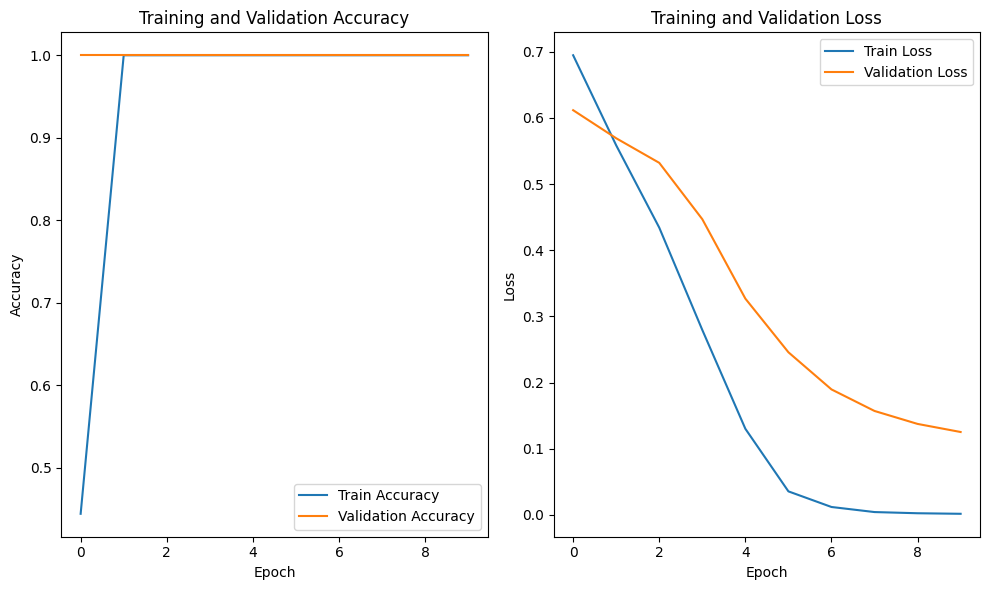

1/1 [==============================] - 0s 102ms/step
Review: Отличный фильм! Очень трогательная история, рекомендую всем!
Predicted sentiment: Positive (Probability: 0.9805)

Review: Самый ужасный фильм, который я когда-либо видел. Потраченное время и деньги.
Predicted sentiment: Negative (Probability: 0.0112)

Модель сохранена.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [97]:
# Создание модели
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, np.array(y_train), epochs=10, batch_size=2, validation_data=(X_test, np.array(y_test)))

# График обучения
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Предсказание на новых данных
new_reviews = [
    "Отличный фильм! Очень трогательная история, рекомендую всем!",
    "Самый ужасный фильм, который я когда-либо видел. Потраченное время и деньги."
]

# Преобразование новых отзывов в последовательности чисел
new_sequences = tokenizer.texts_to_sequences(new_reviews)
padded_new_sequences = pad_sequences(new_sequences, maxlen=max_length, padding='post')

# Предсказание на новых данных
predictions = model.predict(padded_new_sequences)

# Вывод результатов предсказания
for i, review in enumerate(new_reviews):
    sentiment = 'Positive' if predictions[i] > 0.5 else 'Negative'
    print(f"Review: {review}")
    print(f"Predicted sentiment: {sentiment} (Probability: {predictions[i][0]:.4f})")
    print()

# Сохранение модели
model.save('sentiment_rnn_model.h5')
print("Модель сохранена.")


Модель с LSTM

Epoch 1/10
5/5 [==============================] - 2s 119ms/step - loss: 0.6949 - accuracy: 0.2222 - val_loss: 0.6923 - val_accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 0s 14ms/step - loss: 0.6879 - accuracy: 0.5556 - val_loss: 0.6943 - val_accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 0s 13ms/step - loss: 0.6833 - accuracy: 0.5556 - val_loss: 0.6979 - val_accuracy: 0.3333
Epoch 4/10
5/5 [==============================] - 0s 13ms/step - loss: 0.6798 - accuracy: 0.5556 - val_loss: 0.7004 - val_accuracy: 0.3333
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 0.6643 - accuracy: 0.5556 - val_loss: 0.7014 - val_accuracy: 0.3333
Epoch 6/10
5/5 [==============================] - 0s 13ms/step - loss: 0.6402 - accuracy: 0.7778 - val_loss: 0.7054 - val_accuracy: 0.3333
Epoch 7/10
5/5 [==============================] - 0s 18ms/step - loss: 0.5847 - accuracy: 0.7778 - val_loss: 0.7110 - val_accuracy: 0.3333
Epoch 8/10
5/5 [==========

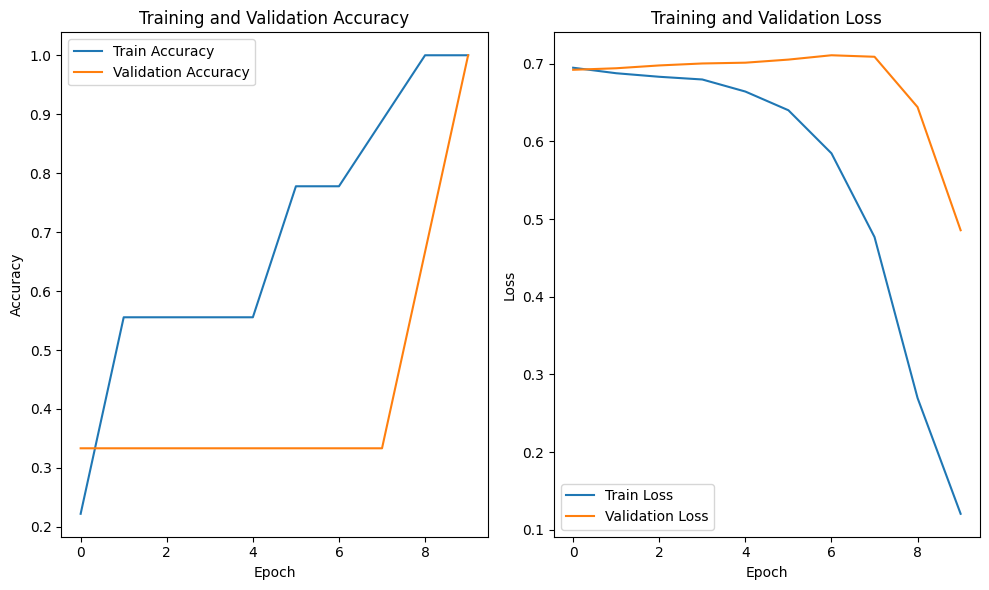

1/1 [==============================] - 0s 300ms/step
Review: Отличный фильм! Очень трогательная история, рекомендую всем!
Predicted sentiment: Positive (Probability: 0.9975)

Review: Самый ужасный фильм, который я когда-либо видел. Потраченное время и деньги.
Predicted sentiment: Positive (Probability: 0.5318)

Модель сохранена.


In [98]:
# Создание модели LSTM
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, np.array(y_train), epochs=10, batch_size=2, validation_data=(X_test, np.array(y_test)))

# График обучения
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Предсказание на новых данных
new_reviews = [
    "Отличный фильм! Очень трогательная история, рекомендую всем!",
    "Самый ужасный фильм, который я когда-либо видел. Потраченное время и деньги."
]

# Преобразование новых отзывов в последовательности чисел
new_sequences = tokenizer.texts_to_sequences(new_reviews)
padded_new_sequences = pad_sequences(new_sequences, maxlen=max_length, padding='post')

# Предсказание на новых данных
predictions = model.predict(padded_new_sequences)

# Вывод результатов предсказания
for i, review in enumerate(new_reviews):
    sentiment = 'Positive' if predictions[i] > 0.5 else 'Negative'
    print(f"Review: {review}")
    print(f"Predicted sentiment: {sentiment} (Probability: {predictions[i][0]:.4f})")
    print()

# Сохранение модели
model.save('sentiment_lstm_model.h5')
print("Модель сохранена.")

Модель с GRU

Epoch 1/10
5/5 [==============================] - 2s 104ms/step - loss: 0.6949 - accuracy: 0.5556 - val_loss: 0.6978 - val_accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 0s 14ms/step - loss: 0.6883 - accuracy: 0.5556 - val_loss: 0.6995 - val_accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 0s 15ms/step - loss: 0.6846 - accuracy: 0.5556 - val_loss: 0.7030 - val_accuracy: 0.3333
Epoch 4/10
5/5 [==============================] - 0s 18ms/step - loss: 0.6825 - accuracy: 0.5556 - val_loss: 0.7054 - val_accuracy: 0.3333
Epoch 5/10
5/5 [==============================] - 0s 17ms/step - loss: 0.6710 - accuracy: 0.5556 - val_loss: 0.7056 - val_accuracy: 0.3333
Epoch 6/10
5/5 [==============================] - 0s 14ms/step - loss: 0.6564 - accuracy: 0.5556 - val_loss: 0.7074 - val_accuracy: 0.3333
Epoch 7/10
5/5 [==============================] - 0s 19ms/step - loss: 0.6259 - accuracy: 0.6667 - val_loss: 0.7076 - val_accuracy: 0.3333
Epoch 8/10
5/5 [==========

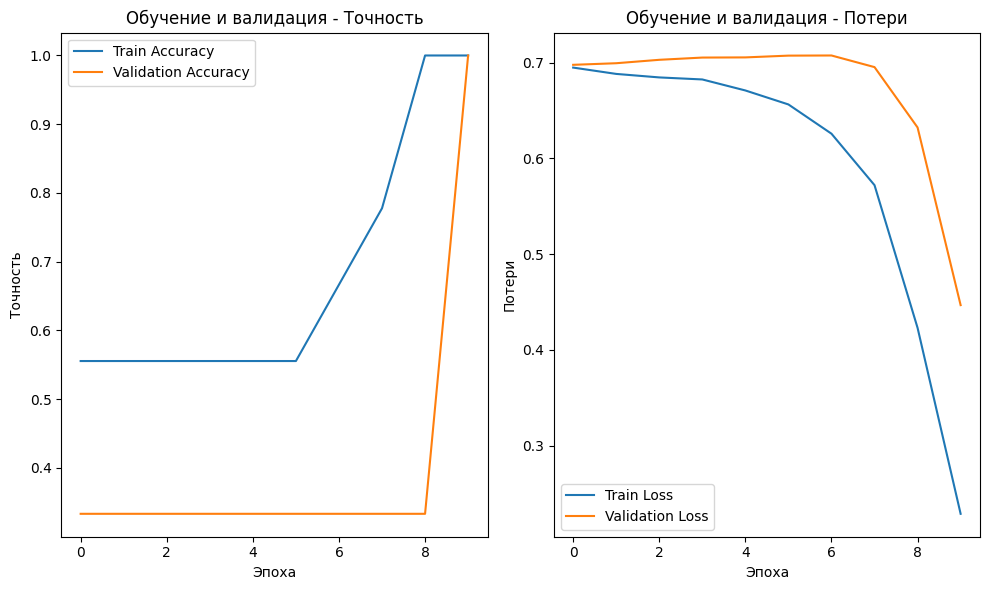

1/1 [==============================] - 0s 453ms/step
Review: Отличный фильм! Очень трогательная история, рекомендую всем!
Predicted sentiment: Positive (Probability: 0.9739)

Review: Самый ужасный фильм, который я когда-либо видел. Потраченное время и деньги.
Predicted sentiment: Negative (Probability: 0.3939)

Модель сохранена.


In [99]:
# Создание модели LSTM
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, np.array(y_train), epochs=10, batch_size=2, validation_data=(X_test, np.array(y_test)))

# График обучения
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Обучение и валидация - Точность')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Обучение и валидация - Потери')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

plt.tight_layout()
plt.show()

# Предсказание на новых данных
new_reviews = [
    "Отличный фильм! Очень трогательная история, рекомендую всем!",
    "Самый ужасный фильм, который я когда-либо видел. Потраченное время и деньги."
]

# Преобразование новых отзывов в последовательности чисел
new_sequences = tokenizer.texts_to_sequences(new_reviews)
padded_new_sequences = pad_sequences(new_sequences, maxlen=max_length, padding='post')

# Предсказание на новых данных
predictions = model.predict(padded_new_sequences)

# Вывод результатов предсказания
for i, review in enumerate(new_reviews):
    sentiment = 'Positive' if predictions[i] > 0.5 else 'Negative'
    print(f"Review: {review}")
    print(f"Predicted sentiment: {sentiment} (Probability: {predictions[i][0]:.4f})")
    print()

# Сохранение модели
model.save('sentiment_lstm_model.h5')
print("Модель сохранена.")

Модель с Bi-LSTM

Epoch 1/10
5/5 [==============================] - 4s 169ms/step - loss: 0.6956 - accuracy: 0.4444 - val_loss: 0.6934 - val_accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 0s 18ms/step - loss: 0.6848 - accuracy: 0.5556 - val_loss: 0.6938 - val_accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 0s 17ms/step - loss: 0.6779 - accuracy: 0.5556 - val_loss: 0.6969 - val_accuracy: 0.3333
Epoch 4/10
5/5 [==============================] - 0s 16ms/step - loss: 0.6718 - accuracy: 0.5556 - val_loss: 0.6977 - val_accuracy: 0.3333
Epoch 5/10
5/5 [==============================] - 0s 17ms/step - loss: 0.6556 - accuracy: 0.5556 - val_loss: 0.6956 - val_accuracy: 0.3333
Epoch 6/10
5/5 [==============================] - 0s 15ms/step - loss: 0.6346 - accuracy: 0.7778 - val_loss: 0.6967 - val_accuracy: 0.3333
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 0.5993 - accuracy: 0.7778 - val_loss: 0.6996 - val_accuracy: 0.3333
Epoch 8/10
5/5 [==========

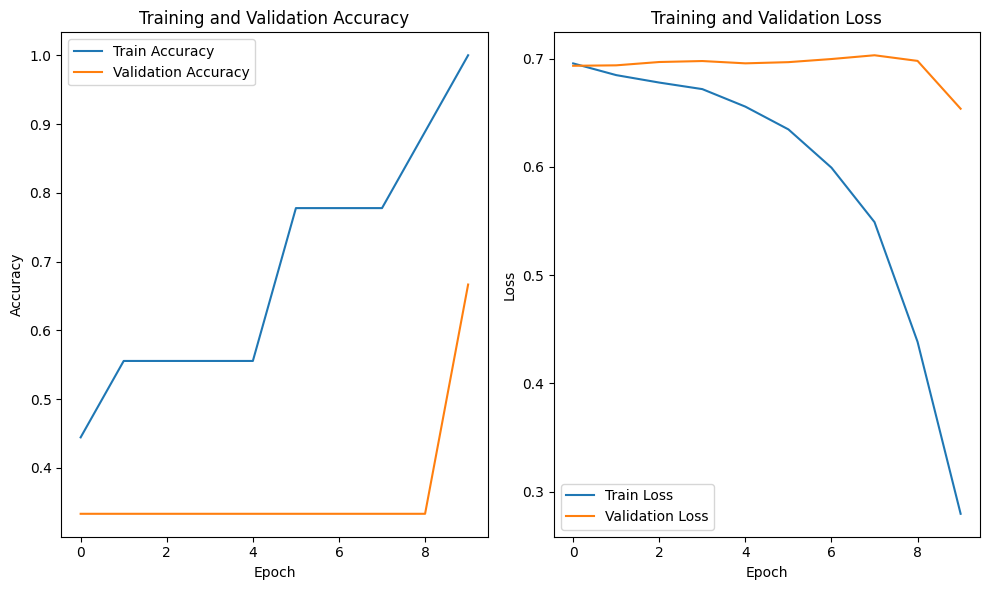

1/1 [==============================] - 1s 581ms/step
Review: Отличный фильм! Очень трогательная история, рекомендую всем!
Predicted sentiment: Positive (Probability: 0.8895)

Review: Самый ужасный фильм, который я когда-либо видел. Потраченное время и деньги.
Predicted sentiment: Negative (Probability: 0.4707)

Модель сохранена.


In [100]:
# Создание модели Bi-LSTM
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, np.array(y_train), epochs=10, batch_size=2, validation_data=(X_test, np.array(y_test)))

# График обучения
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Предсказание на новых данных
new_reviews = [
    "Отличный фильм! Очень трогательная история, рекомендую всем!",
    "Самый ужасный фильм, который я когда-либо видел. Потраченное время и деньги."
]

# Преобразование новых отзывов в последовательности чисел
new_sequences = tokenizer.texts_to_sequences(new_reviews)
padded_new_sequences = pad_sequences(new_sequences, maxlen=max_length, padding='post')

# Предсказание на новых данных
predictions = model.predict(padded_new_sequences)

# Вывод результатов предсказания
for i, review in enumerate(new_reviews):
    sentiment = 'Positive' if predictions[i] > 0.5 else 'Negative'
    print(f"Review: {review}")
    print(f"Predicted sentiment: {sentiment} (Probability: {predictions[i][0]:.4f})")
    print()

# Сохранение модели
model.save('sentiment_bilstm_model.h5')
print("Модель сохранена.")


### **3. Разрешение синонимии и антонимии (Synonym and Antonym Resolution)**

In [101]:
import numpy as np
import nltk
nltk.download('punkt')
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, GRU, Bidirectional
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Примеры пар слов
synonym_pairs = [
    ("большой", "огромный"),
    ("маленький", "крошечный"),
    ("умный", "сообразительный"),
    ("красивый", "прекрасный")
]

antonym_pairs = [
    ("большой", "маленький"),
    ("быстрый", "медленный"),
    ("темный", "светлый"),
    ("день", "ночь")
]

word_pairs = synonym_pairs + antonym_pairs
labels = [1] * len(synonym_pairs) + [0] * len(antonym_pairs)  # 1 для синонимов, 0 для антонимов

# Токенизация слов
tokenized_pairs = [(nltk.word_tokenize(pair[0]), nltk.word_tokenize(pair[1])) for pair in word_pairs]

# Создание словаря слов
word_index = {}
index = 1
for pair in tokenized_pairs:
    for word in pair[0] + pair[1]:
        if word not in word_index:
            word_index[word] = index
            index += 1

# Преобразование слов в индексы и выравнивание последовательностей
indexed_pairs = [
    ([word_index[word] for word in pair[0]], [word_index[word] for word in pair[1]])
    for pair in tokenized_pairs
]
max_len = max(len(pair[0]) + len(pair[1]) for pair in tokenized_pairs)
X = pad_sequences(indexed_pairs, maxlen=max_len)
y = np.array(labels)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1) SimpleRNN

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6782 - accuracy: 1.0000 - val_loss: 0.6987 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 25ms/step - loss: 0.6575 - accuracy: 1.0000 - val_loss: 0.6993 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 31ms/step - loss: 0.6370 - accuracy: 1.0000 - val_loss: 0.6998 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 31ms/step - loss: 0.6164 - accuracy: 1.0000 - val_loss: 0.7005 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 33ms/step - loss: 0.5956 - accuracy: 1.0000 - val_loss: 0.7012 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 33ms/step - loss: 0.5741 - accuracy: 1.0000 - val_loss: 0.7019 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 30ms/step - loss: 0.5519 - accuracy: 1.0000 - val_loss: 0.7024 - val_accuracy: 0.5000
Epoch 8/10
1/1 [=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


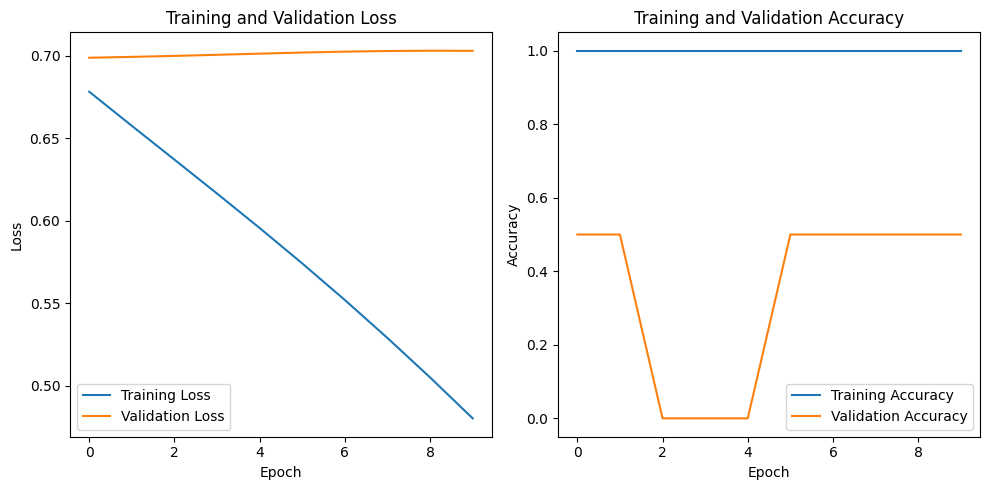

1/1 [==============================] - 0s 18ms/step
Слова: большой и огромный, Предсказанная метка: Синонимы
1/1 [==============================] - 0s 28ms/step
Слова: день и ночь, Предсказанная метка: Антонимы


In [102]:
# Определение параметров модели
vocab_size = len(word_index) + 1
embedding_dim = 100
hidden_units = 100

# Создание модели RNN
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.SimpleRNN(hidden_units),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Оценка модели
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Антонимы", "Синонимы"]))

# Визуализация графика обучения
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Примеры предсказаний для новых пар слов
def predict_pair(pair):
    tokenized_pair = (nltk.word_tokenize(pair[0]), nltk.word_tokenize(pair[1]))
    indexed_pair = ([word_index.get(word, 0) for word in tokenized_pair[0]],
                    [word_index.get(word, 0) for word in tokenized_pair[1]])
    padded_pair = pad_sequences([indexed_pair], maxlen=max_len)
    prediction = model.predict(padded_pair)[0][0]
    return "Синонимы" if prediction > 0.5 else "Антонимы"

new_pair1 = ("большой", "огромный")
print(f"Слова: {new_pair1[0]} и {new_pair1[1]}, Предсказанная метка: {predict_pair(new_pair1)}")

new_pair2 = ("день", "ночь")
print(f"Слова: {new_pair2[0]} и {new_pair2[1]}, Предсказанная метка: {predict_pair(new_pair2)}")

**LSTM**

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_83 (Embedding)    (None, 2, 100)            1500      
                                                                 
 lstm_54 (LSTM)              (None, 100)               80400     
                                                                 
 dense_87 (Dense)            (None, 1)                 101       
                                                                 
Total params: 82001 (320.32 KB)
Trainable params: 82001 (320.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6910 - accuracy: 0.8333 - val_loss: 0.6971 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 45ms/step - loss: 0.6879 - accuracy: 1.0000 - val_loss: 0.6977 - val_accuracy: 0.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


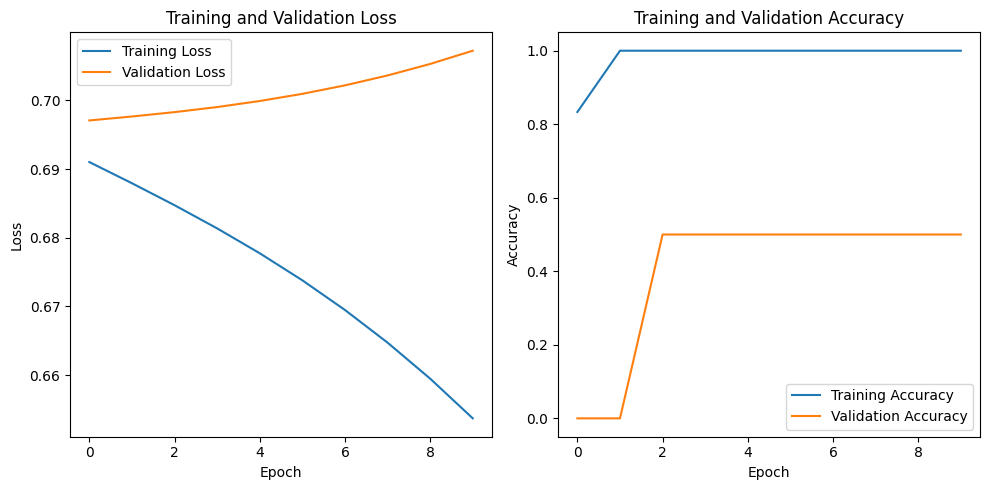

1/1 [==============================] - 0s 20ms/step
Слова: большой и огромный, Предсказанная метка: Синонимы
1/1 [==============================] - 0s 14ms/step
Слова: день и ночь, Предсказанная метка: Антонимы


In [103]:
# Определение параметров модели
vocab_size = len(word_index) + 1
embedding_dim = 100
lstm_units = 100

# Создание модели LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.LSTM(lstm_units),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Вывод структуры модели
model.summary()

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Оценка модели
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Антонимы", "Синонимы"]))

# Визуализация графика обучения
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Примеры предсказаний для новых пар слов
def predict_pair(pair):
    tokenized_pair = (nltk.word_tokenize(pair[0]), nltk.word_tokenize(pair[1]))
    indexed_pair = ([word_index.get(word, 0) for word in tokenized_pair[0]],
                    [word_index.get(word, 0) for word in tokenized_pair[1]])
    padded_pair = pad_sequences([indexed_pair], maxlen=max_len)
    prediction = model.predict(padded_pair)[0][0]
    return "Синонимы" if prediction > 0.5 else "Антонимы"

new_pair1 = ("большой", "огромный")
print(f"Слова: {new_pair1[0]} и {new_pair1[1]}, Предсказанная метка: {predict_pair(new_pair1)}")

new_pair2 = ("день", "ночь")
print(f"Слова: {new_pair2[0]} и {new_pair2[1]}, Предсказанная метка: {predict_pair(new_pair2)}")

**GRU**

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_84 (Embedding)    (None, 2, 100)            1500      
                                                                 
 gru_7 (GRU)                 (None, 100)               60600     
                                                                 
 dense_88 (Dense)            (None, 1)                 101       
                                                                 
Total params: 62201 (242.97 KB)
Trainable params: 62201 (242.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6901 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 33ms/step - loss: 0.6833 - accuracy: 0.8333 - val_loss: 0.6935 - val_accuracy: 0.5000
Epo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


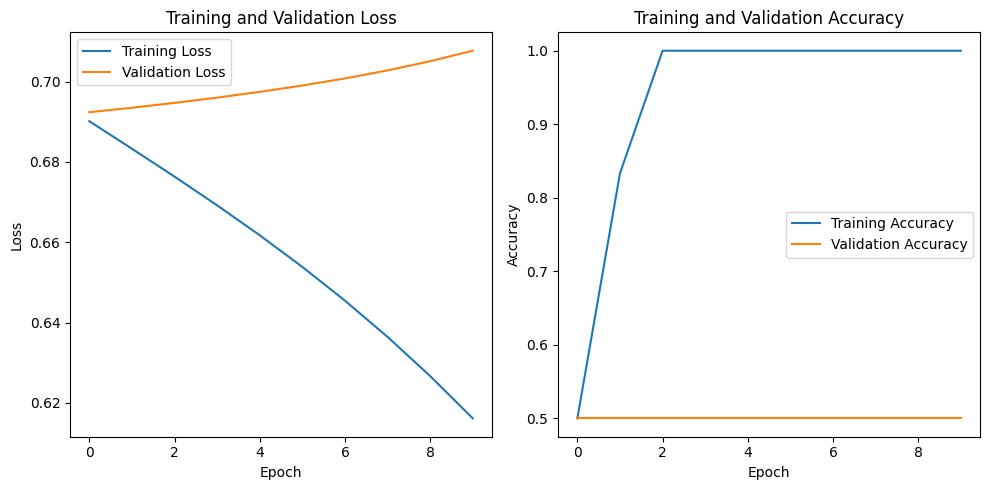

1/1 [==============================] - 0s 17ms/step
Слова: большой и огромный, Предсказанная метка: Синонимы
1/1 [==============================] - 0s 16ms/step
Слова: день и ночь, Предсказанная метка: Антонимы


In [104]:
# Определение параметров модели
vocab_size = len(word_index) + 1
embedding_dim = 100
gru_units = 100

# Создание модели GRU
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.GRU(gru_units),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Вывод структуры модели
model.summary()

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Оценка модели
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Антонимы", "Синонимы"]))

# Визуализация графика обучения
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Примеры предсказаний для новых пар слов
def predict_pair(pair):
    tokenized_pair = (nltk.word_tokenize(pair[0]), nltk.word_tokenize(pair[1]))
    indexed_pair = ([word_index.get(word, 0) for word in tokenized_pair[0]],
                    [word_index.get(word, 0) for word in tokenized_pair[1]])
    padded_pair = pad_sequences([indexed_pair], maxlen=max_len)
    prediction = model.predict(padded_pair)[0][0]
    return "Синонимы" if prediction > 0.5 else "Антонимы"

new_pair1 = ("большой", "огромный")
print(f"Слова: {new_pair1[0]} и {new_pair1[1]}, Предсказанная метка: {predict_pair(new_pair1)}")

new_pair2 = ("день", "ночь")
print(f"Слова: {new_pair2[0]} и {new_pair2[1]}, Предсказанная метка: {predict_pair(new_pair2)}")

**Bi LSTM**

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_85 (Embedding)    (None, 2, 100)            1500      
                                                                 
 bidirectional_31 (Bidirect  (None, 200)               160800    
 ional)                                                          
                                                                 
 dense_89 (Dense)            (None, 1)                 201       
                                                                 
Total params: 162501 (634.77 KB)
Trainable params: 162501 (634.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.6939 - accuracy: 0.3333 - val_loss: 0.6975 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 30ms/step - loss:

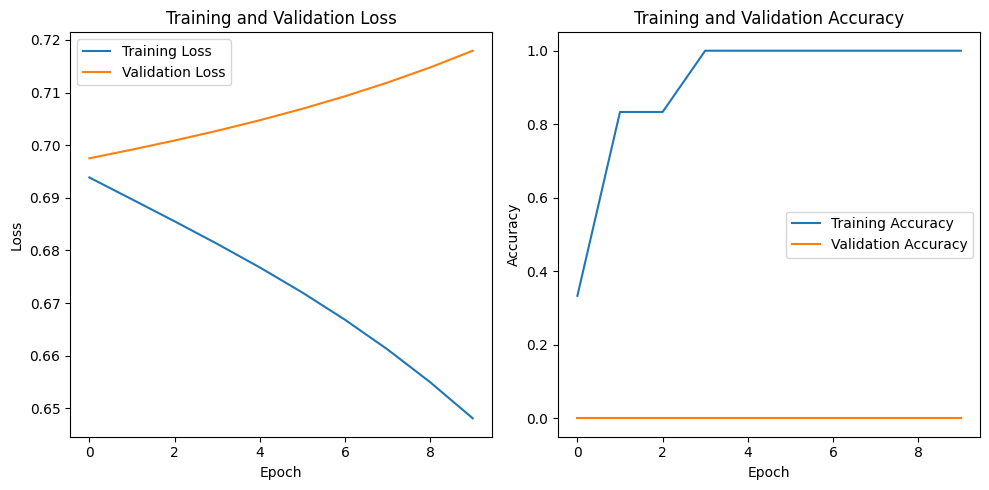

1/1 [==============================] - 0s 27ms/step
Слова: большой и огромный, Предсказанная метка: Синонимы
1/1 [==============================] - 0s 25ms/step
Слова: день и ночь, Предсказанная метка: Антонимы


In [105]:
# Определение параметров модели
vocab_size = len(word_index) + 1
embedding_dim = 100
lstm_units = 100

# Создание модели BiLSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Вывод структуры модели
model.summary()

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Оценка модели
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Антонимы", "Синонимы"]))

# Визуализация графика обучения
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Примеры предсказаний для новых пар слов
def predict_pair(pair):
    tokenized_pair = (nltk.word_tokenize(pair[0]), nltk.word_tokenize(pair[1]))
    indexed_pair = ([word_index.get(word, 0) for word in tokenized_pair[0]],
                    [word_index.get(word, 0) for word in tokenized_pair[1]])
    padded_pair = pad_sequences([indexed_pair], maxlen=max_len)
    prediction = model.predict(padded_pair)[0][0]
    return "Синонимы" if prediction > 0.5 else "Антонимы"

new_pair1 = ("большой", "огромный")
print(f"Слова: {new_pair1[0]} и {new_pair1[1]}, Предсказанная метка: {predict_pair(new_pair1)}")

new_pair2 = ("день", "ночь")
print(f"Слова: {new_pair2[0]} и {new_pair2[1]}, Предсказанная метка: {predict_pair(new_pair2)}")

**LSTM + GRU**

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_86 (Embedding)    (None, 2, 100)            1500      
                                                                 
 bidirectional_32 (Bidirect  (None, 2, 128)            84480     
 ional)                                                          
                                                                 
 bidirectional_33 (Bidirect  (None, 128)               74496     
 ional)                                                          
                                                                 
 dense_90 (Dense)            (None, 1)                 129       
                                                                 
Total params: 160605 (627.36 KB)
Trainable params: 160605 (627.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


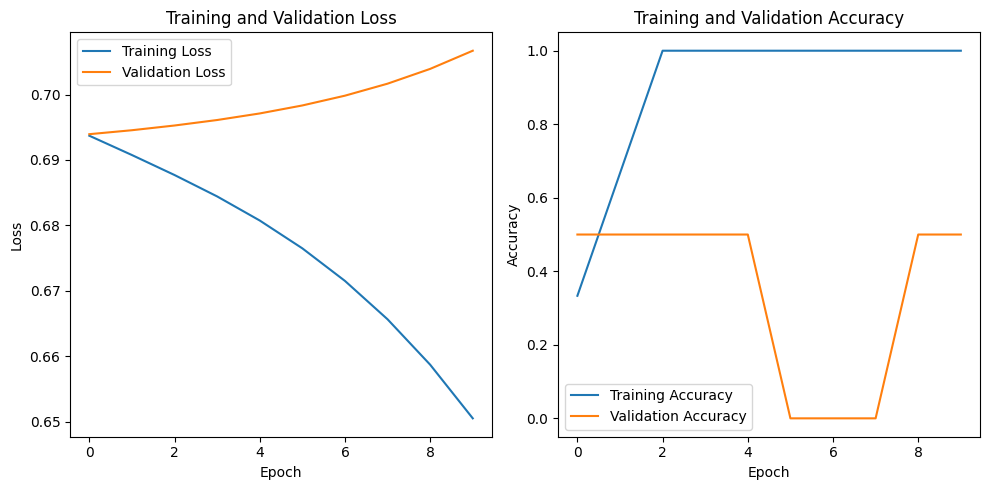

1/1 [==============================] - 0s 15ms/step
Слова: большой и огромный, Предсказанная метка: Синонимы
1/1 [==============================] - 0s 15ms/step
Слова: день и ночь, Предсказанная метка: Антонимы


In [106]:
# Определение параметров модели
vocab_size = len(word_index) + 1
embedding_dim = 100
lstm_units = 64
gru_units = 64

# Создание гибридной модели LSTM + GRU
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_units)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Вывод структуры модели
model.summary()

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Оценка модели
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Антонимы", "Синонимы"]))

# Визуализация графика обучения
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Примеры предсказаний для новых пар слов
def predict_pair(pair):
    tokenized_pair = (nltk.word_tokenize(pair[0]), nltk.word_tokenize(pair[1]))
    indexed_pair = ([word_index.get(word, 0) for word in tokenized_pair[0]],
                    [word_index.get(word, 0) for word in tokenized_pair[1]])
    padded_pair = pad_sequences([indexed_pair], maxlen=max_len)
    prediction = model.predict(padded_pair)[0][0]
    return "Синонимы" if prediction > 0.5 else "Антонимы"

new_pair1 = ("большой", "огромный")
print(f"Слова: {new_pair1[0]} и {new_pair1[1]}, Предсказанная метка: {predict_pair(new_pair1)}")

new_pair2 = ("день", "ночь")
print(f"Слова: {new_pair2[0]} и {new_pair2[1]}, Предсказанная метка: {predict_pair(new_pair2)}")
